In [41]:
import tensorflow as tf


# Check tensorflow version
print("Using Tensorflow %s\n" % (tf.__version__))

Using Tensorflow 2.7.0



In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
import numpy as np
import os
import keras
from keras.preprocessing import image
from keras import Model
from keras.models import load_model

In [44]:
model = load_model("/content/gdrive/MyDrive/HAR_CCTV_Models/standford40_tvt_ds_seed_13_inceptionResnet_ann_added_02.h5")
#standford40_tvt_ds_seed_13_inceptionResnet_ann_added_02  standford40_tvt_ds_seed_13_mobileNet_ann_added_04

In [45]:
model.summary();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 14, 14, 1536)     54336736  
 onal)                                                           
                                                                 
 ClassConv (Conv2D)          (None, 14, 14, 1024)      14156800  
                                                                 
 GAP (GlobalAveragePooling2D  (None, 1024)             0         
 )                                                               
                                                                 
 fc-1 (Dense)                (None, 2048)              2099200   
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 fc-2 (Dense)                (None, 1024)             

In [46]:
layer_name = 'fc-2'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_layer_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2_input (  [(None, 500, 500, 3)]    0         
 InputLayer)                                                     
                                                                 
 inception_resnet_v2 (Functi  (None, 14, 14, 1536)     54336736  
 onal)                                                           
                                                                 
 ClassConv (Conv2D)          (None, 14, 14, 1024)      14156800  
                                                                 
 GAP (GlobalAveragePooling2D  (None, 1024)             0         
 )                                                               
                                                                 
 fc-1 (Dense)                (None, 2048)              2099200   
                                                           

Iterate through all test and val images and extract features using trained CNN model

In [47]:
def prepare_image(file):
    img = image.load_img(file,target_size=(500,500));
    img_array = image.img_to_array(img);
    img_array_expanded_dims = np.expand_dims(img_array,axis=0);
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


In [48]:
X_train = np.zeros((6665,1024));
y_train = np.zeros((6665));
X_val = np.zeros((1417,1024));
y_val = np.zeros((1417))
X_test = np.zeros((1450,1024));
y_test = np.zeros((1450))

In [49]:
labels = ["applauding", "blowing_bubbles", "brushing_teeth", "cleaning_the_floor", "climbing",
               "cooking", "cutting_trees", "cutting_vegetables", "drinking", "feeding_a_horse", "fishing",
               "fixing_a_bike","fixing_a_car", "gardening", "holding_an_umbrella", "jumping", "looking_through_a_microscope",
               "looking_through_a_telescope", "phoning", "playing_guitar", "playing_violin", "pouring_liquid", "pushing_a_cart",
               "reading", "riding_a_bike", "riding_a_horse", "rowing_a_boat", "running", "shooting_an_arrow", "smoking", "taking_photos",
               "texting_message", "throwing_frisby", "using_a_computer", "walking_the_dog", "washing_dishes", "watching_TV", "waving_hands",
               "writing_on_a_board", "writing_on_a_book"]

In [50]:
labels[0]

'applauding'

In [51]:
i=0;
count = 0;
for activity in range(0,40):
    img_path='/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/%s/' %(labels[activity]);
    print(img_path)
    count = count+1;
    print(count)
    for filename in os.listdir(img_path):
        if filename.endswith(".jpg"):
            img = prepare_image(img_path+filename);
            feat = intermediate_layer_model.predict(img);
            X_train[i]=feat;
            y_train[i]=activity;
            i = i+1;
            continue
        else:
            continue            
    
                      
           

/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/applauding/
1
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/blowing_bubbles/
2
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/brushing_teeth/
3
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/cleaning_the_floor/
4
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/climbing/
5
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/cooking/
6
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/cutting_trees/
7
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/cutting_vegetables/
8
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/drinking/
9
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/feeding_a_horse/
10
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/fishing/
11
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/fixing_a_bike/
12
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/train/fixing_a_car/
13
/content/gdrive/MyDrive/standford40_tvt_ds_se

In [52]:
i=0;
count = 0;
for activity in range(0,40):
    img_path='/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/%s/' %(labels[activity]);
    print(img_path)
    count = count+1;
    print(count)
    for filename in os.listdir(img_path):
        if filename.endswith(".jpg"):
            img = prepare_image(img_path+filename);
            feat = intermediate_layer_model.predict(img);
            X_val[i]=feat;
            y_val[i]=activity;
            i = i+1;
            continue
        else:
            continue   

/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/applauding/
1
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/blowing_bubbles/
2
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/brushing_teeth/
3
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/cleaning_the_floor/
4
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/climbing/
5
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/cooking/
6
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/cutting_trees/
7
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/cutting_vegetables/
8
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/drinking/
9
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/feeding_a_horse/
10
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/fishing/
11
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validation/fixing_a_bike/
12
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/validati

In [53]:
i=0;
count = 0;
for activity in range(0,40):
    img_path='/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/%s/' %(labels[activity]);
    print(img_path)
    count = count+1;
    print(count)
    for filename in os.listdir(img_path):
        if filename.endswith(".jpg"):
            img = prepare_image(img_path+filename);
            feat = intermediate_layer_model.predict(img);
            X_test[i]=feat;
            y_test[i]=activity;
            i = i+1;
            continue
        else:
            continue   

/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/applauding/
1
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/blowing_bubbles/
2
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/brushing_teeth/
3
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/cleaning_the_floor/
4
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/climbing/
5
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/cooking/
6
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/cutting_trees/
7
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/cutting_vegetables/
8
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/drinking/
9
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/feeding_a_horse/
10
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/fishing/
11
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/fixing_a_bike/
12
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/fixing_a_car/
13
/content/gdrive/MyDrive/standford40_tvt_ds_seed_13/test/ga

In [54]:
import matplotlib.pyplot as plt
import scipy.io

In [55]:
'''Preprocessing'''
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler();
X_train = sc_X.fit_transform(X_train);
X_val = sc_X.transform(X_val);
X_test = sc_X.transform(X_test);

'''classifier_cnn '''
from sklearn.svm import SVC
classifier = SVC(C=100, kernel='rbf', probability=True);
classifier.fit(X_train,y_train)
y_pred_train = classifier.predict(X_train);



For training data:	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       188
         1.0       1.00      1.00      1.00       180
         2.0       1.00      1.00      1.00       131
         3.0       1.00      1.00      1.00       159
         4.0       1.00      1.00      1.00       199
         5.0       1.00      1.00      1.00       214
         6.0       1.00      1.00      1.00       153
         7.0       1.00      1.00      1.00       139
         8.0       1.00      1.00      1.00       175
         9.0       1.00      1.00      1.00       210
        10.0       1.00      1.00      1.00       186
        11.0       1.00      1.00      1.00       154
        12.0       1.00      1.00      1.00       172
        13.0       1.00      1.00      1.00       126
        14.0       1.00      1.00      1.00       200
        15.0       1.00      1.00      1.00       207
        16.0       1.00      1.00      1.00       129
      

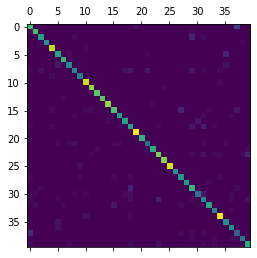

In [56]:
'''For Training Data '''
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print("\nFor training data:\t");
print(classification_report(y_train,y_pred_train));
print(accuracy_score(y_train,y_pred_train));
cm_train = confusion_matrix(y_train,y_pred_train);
#plt.matshow(cm_train)

#%%

''' For Testing Data'''
y_pred_test = classifier.predict(X_test);
print("\nFor test data:\t");
print(classification_report(y_test,y_pred_test));
print(accuracy_score(y_test,y_pred_test));
cm_test = confusion_matrix(y_test,y_pred_test);
plt.matshow(cm_test)

In [57]:
'''import pickle
# create an iterator object with write permission - model.pkl
with open('svm_mobilenet', 'wb') as files:
    pickle.dump(classifier, files)'''

"import pickle\n# create an iterator object with write permission - model.pkl\nwith open('svm_mobilenet', 'wb') as files:\n    pickle.dump(classifier, files)"

In [58]:
'''import shutil
shutil.copy('/content/svm_mobilenet','/content/gdrive/MyDrive/HAR_CCTV_Models/')'''

"import shutil\nshutil.copy('/content/svm_mobilenet','/content/gdrive/MyDrive/HAR_CCTV_Models/')"

In [59]:
'''with open('svm_inceptionResnet' , 'rb') as f:
    lr = pickle.load(f)'''

"with open('svm_inceptionResnet' , 'rb') as f:\n    lr = pickle.load(f)"

For Yolo Cropped images

In [60]:
'''import pickle
with open('/content/gdrive/MyDrive/HAR_CCTV_Models/svm_mobilenet' , 'rb') as f:
    classifier = pickle.load(f)
    #svm_inceptionResnet'''

"import pickle\nwith open('/content/gdrive/MyDrive/HAR_CCTV_Models/svm_mobilenet' , 'rb') as f:\n    classifier = pickle.load(f)\n    #svm_inceptionResnet"

In [61]:
X_test_cropped = np.zeros((1439,1024));
y_test_cropped = np.zeros((1439))

In [62]:
i=0;
count = 0;
for activity in range(0,40):
    img_path='/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/%s/' %(labels[activity]);
    print(img_path)
    count = count+1;
    print(count)
    for filename in os.listdir(img_path):
        if filename.endswith(".jpg"):
            img = prepare_image(img_path+filename);
            feat = intermediate_layer_model.predict(img);
            X_test_cropped[i]=feat;
            y_test_cropped[i]=activity;
            i = i+1;
            continue
        else:
            continue     

/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/applauding/
1
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/blowing_bubbles/
2
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/brushing_teeth/
3
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/cleaning_the_floor/
4
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/climbing/
5
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/cooking/
6
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/cutting_trees/
7
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/cutting_vegetables/
8
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/drinking/
9
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/feeding_a_horse/
10
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/fishing/
11
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/fixing_a_bike/
12
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/fixing_a_car/
13
/content/gdrive/MyDrive/standford_tvt_ds_seed_13_test/gardening/
14
/content/gdrive/


For test data:	
              precision    recall  f1-score   support

         0.0       0.51      0.71      0.59        49
         1.0       0.82      0.84      0.83        38
         2.0       0.74      0.66      0.70        44
         3.0       0.81      0.81      0.81        27
         4.0       0.92      0.62      0.74        39
         5.0       0.75      0.31      0.44        39
         6.0       0.81      0.79      0.80        28
         7.0       0.67      0.75      0.71        32
         8.0       0.48      0.67      0.56        45
         9.0       0.91      0.45      0.61        22
        10.0       0.57      0.59      0.58        29
        11.0       0.71      0.81      0.76        43
        12.0       0.70      0.68      0.69        34
        13.0       0.65      0.89      0.75        36
        14.0       0.93      0.35      0.51        37
        15.0       0.84      0.64      0.73        50
        16.0       0.85      0.72      0.78        32
        17

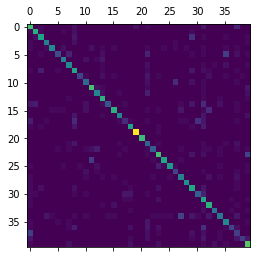

In [63]:
''' For Testing Data'''
X_test_cropped = sc_X.transform(X_test_cropped);
y_pred_test_cropped = classifier.predict(X_test_cropped);
print("\nFor test data:\t");
print(classification_report(y_test_cropped,y_pred_test_cropped));
print(accuracy_score(y_test_cropped,y_pred_test_cropped));
cm_test = confusion_matrix(y_test_cropped,y_pred_test_cropped);
plt.matshow(cm_test)